Column Names: Index(['Company being reviewed', 'Competitor category', 'user_review_name',
       'published_date', 'star_rating', 'review_title', 'review_body',
       'Sentiment of review', 'Polarity', 'plastic surgery',
       'Body & Liposuction', 'Hair Transplant', 'Veins',
       'Rejuvenation & Fillers', 'Laser Hair Removal', 'Dermatology',
       'Haemorrhoids', 'Snoring', 'Bunion', 'Competitors', 'Cost', 'Speed',
       'Staff assistance', 'experience', 'Online', 'Cleanliness', 'Gratitude',
       'results'],
      dtype='object')
Average Ratings per Competitor:
Company being reviewed
Cadogan Clinic              4.822785
Champneys                   2.166667
Cosmetic Skin Clinic        4.876972
Destination Skin            4.308176
EF Medispa                  3.285714
Harley Street Skin          4.822785
MYA Cosmetic Surgery        4.169451
PHI Clinic                  4.919831
Sk:n                        4.471903
The Harley Medical Group    4.399736
The Hospital Group          4.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8352\2557517399.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['published_date'].dt.to_period('M')


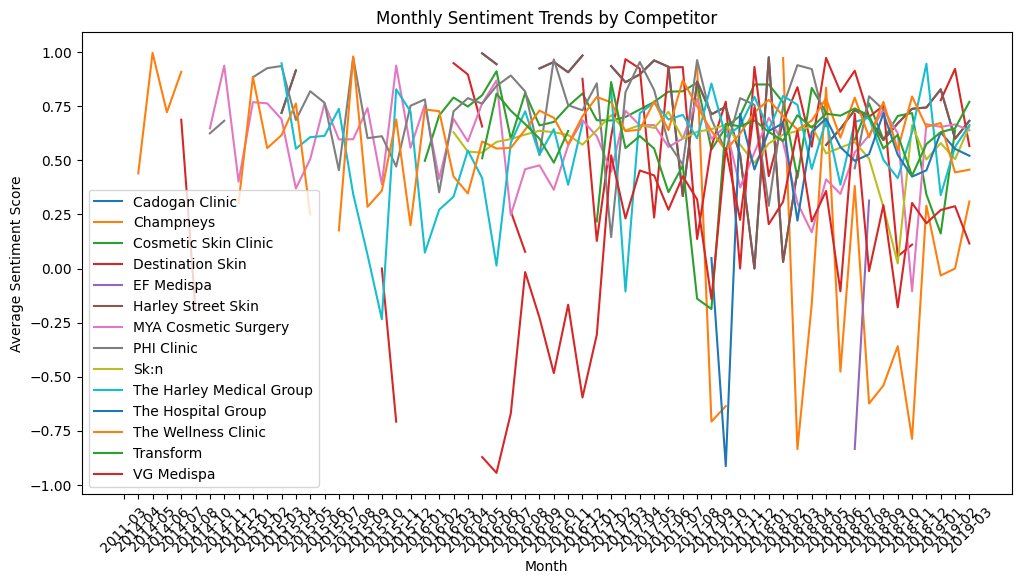

TypeError: '<' not supported between instances of 'int' and 'str'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cosmetic.csv')  # Replace with the path to your data file

# Check column names to confirm
print("Column Names:", df.columns)

# Standardize column names to remove extra spaces if any
df.columns = df.columns.str.strip()

# Convert star rating to numerical values
df['star_rating'] = df['star_rating'].str.extract(r'(\d)').astype(float)

# Convert published_date to datetime format for time-based analysis
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Extract month and year from the published date for trend analysis
df['month'] = df['published_date'].dt.to_period('M')
df['year'] = df['published_date'].dt.year

# Define competitor and treatment columns
competitor_column = 'Company being reviewed'
treatment_columns = ['plastic surgery', 'Body & Liposuction', 'Hair Transplant', 'Veins',
                     'Rejuvenation & Fillers', 'Laser Hair Removal', 'Dermatology',
                     'Haemorrhoids', 'Snoring', 'Bunion']
review_metrics = ['Cost', 'Speed', 'Staff assistance', 'experience', 'Online', 'Cleanliness',
                  'Gratitude', 'results']

# Convert 'Polarity' column to numeric, if not already, and handle non-numeric values
df['Polarity'] = pd.to_numeric(df['Polarity'], errors='coerce')

# Set up a sentiment threshold for analysis
positive_threshold = 0.5
negative_threshold = -0.5

### 1. Calculate Average Rating and Sentiment per Competitor ###
# Drop rows with non-numeric values in 'star_rating' or 'Polarity' columns
df = df.dropna(subset=['star_rating', 'Polarity'])

# Group by competitor and calculate average rating and sentiment
average_ratings = df.groupby(competitor_column)['star_rating'].mean()
average_sentiments = df.groupby(competitor_column)['Polarity'].mean()

print("Average Ratings per Competitor:")
print(average_ratings)

print("\nAverage Sentiments per Competitor:")
print(average_sentiments)

### 2. Sentiment Analysis Over Time ###
# Monthly sentiment trend for each competitor
monthly_sentiment = df.groupby([competitor_column, 'month'])['Polarity'].mean().unstack()

# Plot monthly sentiment trends
plt.figure(figsize=(12, 6))
for competitor in monthly_sentiment.index:
    plt.plot(monthly_sentiment.columns.astype(str), monthly_sentiment.loc[competitor], label=competitor)

plt.title('Monthly Sentiment Trends by Competitor')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 3. Topic Mention Frequency and Sentiment Analysis ###
# Count mentions of each treatment type
topic_counts = df[treatment_columns].apply(pd.Series.value_counts).fillna(0).sum(axis=0)

# Calculate average sentiment associated with each treatment type
average_sentiment_by_topic = {}
for col in treatment_columns:
    if col in df.columns:
        topic_sentiments = df[df[col] != 0]['Polarity']  # Filter only mentions
        average_sentiment_by_topic[col] = topic_sentiments.mean()

# Display treatment mention frequencies and average sentiment
print("\nTopic Mention Frequency:")
print(topic_counts)

print("\nAverage Sentiment by Topic:")
print(average_sentiment_by_topic)

### 4. Competitor Comparison on Review Metrics ###
# Convert review metric columns to numeric if needed, handling errors gracefully
for metric in review_metrics:
    df[metric] = pd.to_numeric(df[metric], errors='coerce')

# Drop rows with non-numeric values in any of the review metrics columns before grouping
df = df.dropna(subset=review_metrics)

# Average ratings and sentiments for each competitor on various review metrics
metric_sentiment = {}
for metric in review_metrics:
    metric_sentiment[metric] = df.groupby(competitor_column)[metric].mean()

metric_sentiment_df = pd.DataFrame(metric_sentiment)
print("\nAverage Review Metrics Sentiment by Competitor:")
print(metric_sentiment_df)

### 5. Visualization ###
# Bar Plot of Average Ratings by Competitor
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette="viridis")
plt.title("Average Ratings by Competitor")
plt.xlabel("Competitor")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.show()

# Heatmap of Topic Mentions and Sentiment Scores
plt.figure(figsize=(10, 6))
sns.heatmap(df[treatment_columns].apply(lambda x: x.value_counts()).fillna(0).T, annot=True, cmap="YlGnBu")
plt.title("Frequency of Treatment Mentions by Topic")
plt.xlabel("Mention Count")
plt.ylabel("Treatment Type")
plt.show()

# Pie Chart of Sentiment Distribution
sentiment_counts = df['Sentiment of review'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8352\3506231799.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings, y=average_ratings.index, palette="viridis")


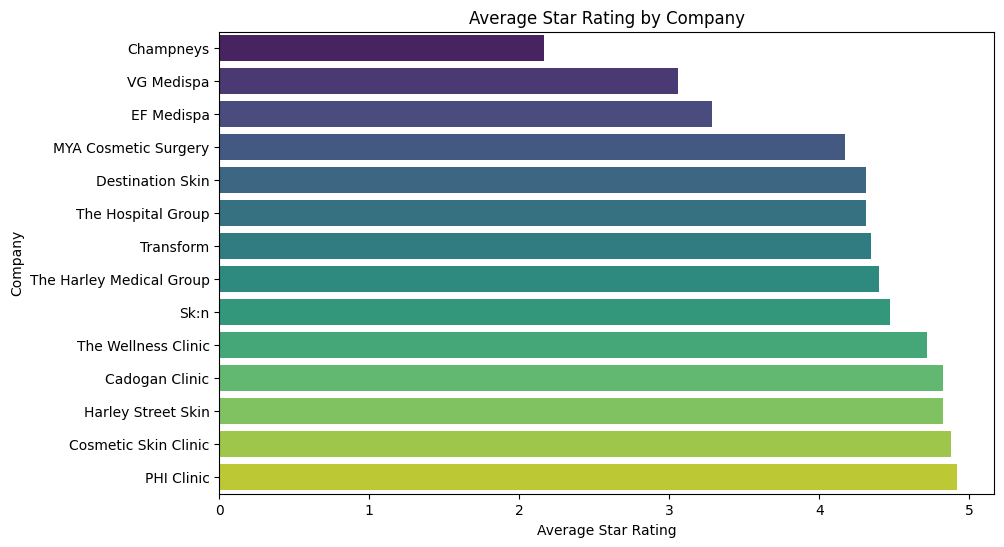

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8352\3506231799.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment Category', palette='coolwarm')


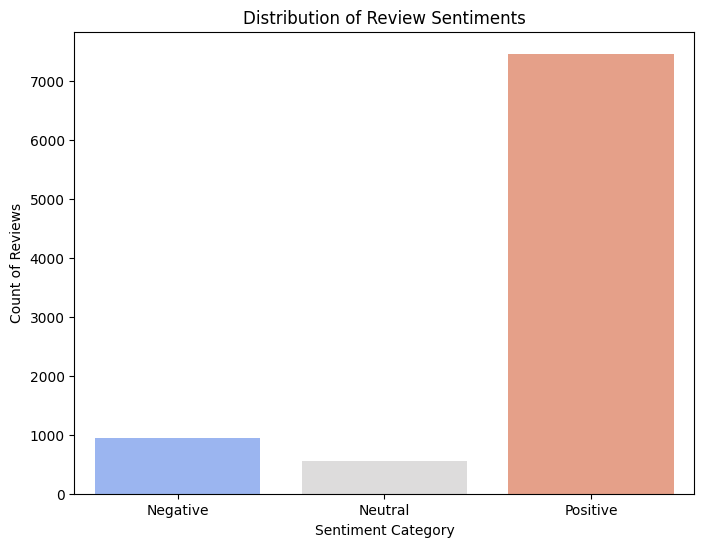

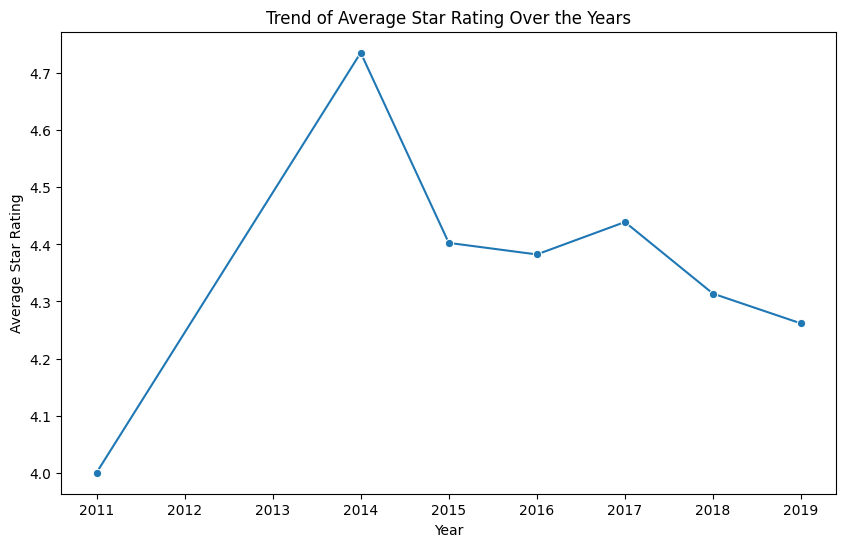

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8352\3506231799.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_counts.values, y=service_counts.index, palette="Blues_d")


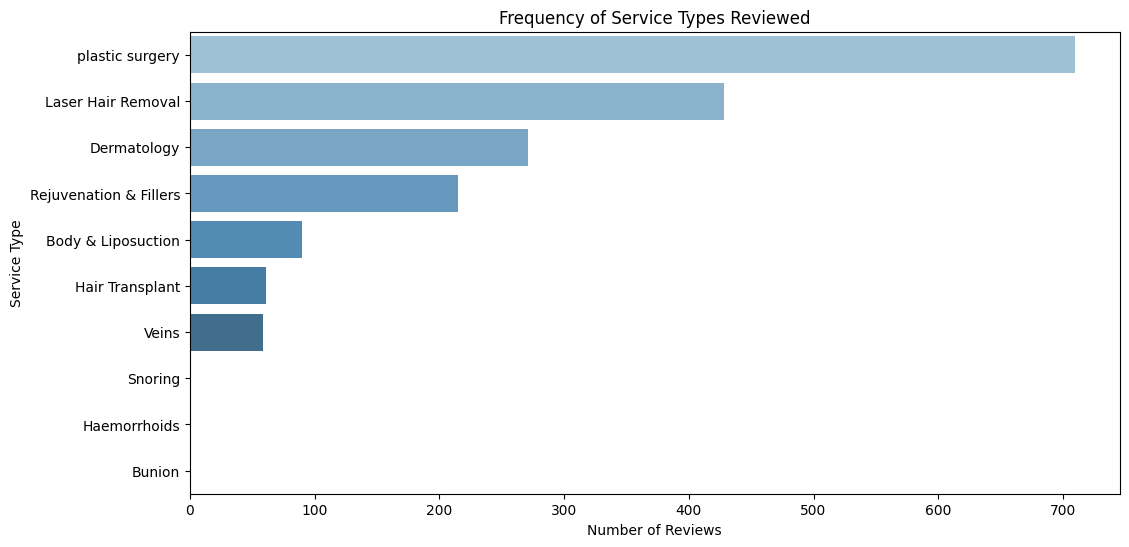

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv('cosmetic.csv')

# Clean data: Convert 'star_rating' to numeric by extracting the number
df['star_rating'] = df['star_rating'].str.extract(r'(\d)').astype(float)

# Convert 'published_date' to datetime and extract the year for trend analysis
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['year'] = df['published_date'].dt.year

# Handle missing values: Replace 'Cost', 'Speed', etc. columns with 0 for missing values
factor_columns = ['Cost', 'Speed', 'Staff assistance', 'experience', 'Online', 'Cleanliness', 'Gratitude', 'results']
df[factor_columns] = df[factor_columns].fillna(0)

# Convert 'Polarity' to numeric, coercing errors
df['Polarity'] = pd.to_numeric(df['Polarity'], errors='coerce')

# Drop rows with NaN in 'Polarity' if any exist
df = df.dropna(subset=['Polarity'])

# Plot 1: Average Star Rating by Company
plt.figure(figsize=(10, 6))
average_ratings = df.groupby('Company being reviewed')['star_rating'].mean().sort_values()
sns.barplot(x=average_ratings, y=average_ratings.index, palette="viridis")
plt.title("Average Star Rating by Company")
plt.xlabel("Average Star Rating")
plt.ylabel("Company")
plt.show()

# Plot 2: Categorize the polarity into sentiment groups
df['Sentiment Category'] = pd.cut(df['Polarity'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Plot the sentiment distribution as a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment Category', palette='coolwarm')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count of Reviews')
plt.show()

# Plot 3: Trend of Average Rating Over the Years
plt.figure(figsize=(10, 6))
average_yearly_ratings = df.groupby('year')['star_rating'].mean()
sns.lineplot(x=average_yearly_ratings.index, y=average_yearly_ratings.values, marker='o')
plt.title("Trend of Average Star Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Star Rating")
plt.show()

# Plot 4: Frequency of Service Types Reviewed
service_columns = [
    'plastic surgery', 'Body & Liposuction', 'Hair Transplant', 'Veins',
    'Rejuvenation & Fillers', 'Laser Hair Removal', 'Dermatology', 'Haemorrhoids',
    'Snoring', 'Bunion'
]

# Convert service columns to strings to ensure '0' is comparable, and count non-zero entries
df[service_columns] = df[service_columns].fillna('0').astype(str)
service_counts = (df[service_columns] != '0').sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=service_counts.values, y=service_counts.index, palette="Blues_d")
plt.title("Frequency of Service Types Reviewed")
plt.xlabel("Number of Reviews")
plt.ylabel("Service Type")
plt.show()
